# Checklist
ขั้นตอนทั้งหมดที่ต้องทำกับทุกตาราง
1. Name 
2. Type (Category, int/float, bounded/unbounded, text, structured, etc.)
3. % of missing values
4. Type of distribution (Gaussian, uniform, logarithmic, etc.)
5. Noisiness and type of noise (stochastic, outliers, rounding errors, etc.)
6. Possibly useful for the task?

In [1]:
import pandas as pd

users = pd.read_csv('../../2_data/20180319/customer.csv')
print(users.shape)
users.head()

(36212, 17)


,CUSTOMER_ID,FIRST_NAME,IS_DESIGNER,BPCODE,ADDRESS_NO,ADDRESS_POSTAL_CODE,ADDRESS_PROVINCE_ID,ADDRESS_PROVINCE,ADDRESS_STREET,ADDRESS_DISTRICT_ID,ADDRESS_DISTRICT,ADDRESS_SUB_DISTRICT_ID,ADDRESS_SUB_DISTRICT,ADDRESS_TYPE,ADDRESS_BUILDING,ADDRESS_OFFICE_NAME,DATE_OF_BIRTH
0,"2,083",ฐนันทิพย์,N,1100698858,2,20170,04090000000,จ.ชลบุรี,เซิดน้อย,04094570000,อ.บ้านบึง,04094573409,ต.บ้านบึง,บ้านพักอาศัย,เอเชีย,Cupcode,1988-10-30
1,"2,102",ทดสอบ002,N,1900036840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"2,223",Ping,N,1900036887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"2,224",มาศสุภา,N,1900036888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"2,284",Tanate,N,1900036922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2. แปลง Type ให้ถูกต้อง

In [2]:
users.dtypes

CUSTOMER_ID                object
FIRST_NAME                 object
IS_DESIGNER                object
BPCODE                      int64
ADDRESS_NO                 object
ADDRESS_POSTAL_CODE        object
ADDRESS_PROVINCE_ID        object
ADDRESS_PROVINCE           object
ADDRESS_STREET             object
ADDRESS_DISTRICT_ID        object
ADDRESS_DISTRICT           object
ADDRESS_SUB_DISTRICT_ID    object
ADDRESS_SUB_DISTRICT       object
ADDRESS_TYPE               object
ADDRESS_BUILDING           object
ADDRESS_OFFICE_NAME        object
DATE_OF_BIRTH              object
dtype: object

customer_id ต้องเป็น int

In [3]:
import locale
locale.setlocale(locale.LC_ALL, '') 

new_users = users[:]
new_users['CUSTOMER_ID'] = users['CUSTOMER_ID'].apply(locale.atoi)
new_users.head()

,CUSTOMER_ID,FIRST_NAME,IS_DESIGNER,BPCODE,ADDRESS_NO,ADDRESS_POSTAL_CODE,ADDRESS_PROVINCE_ID,ADDRESS_PROVINCE,ADDRESS_STREET,ADDRESS_DISTRICT_ID,ADDRESS_DISTRICT,ADDRESS_SUB_DISTRICT_ID,ADDRESS_SUB_DISTRICT,ADDRESS_TYPE,ADDRESS_BUILDING,ADDRESS_OFFICE_NAME,DATE_OF_BIRTH
0,2083,ฐนันทิพย์,N,1100698858,2,20170,04090000000,จ.ชลบุรี,เซิดน้อย,04094570000,อ.บ้านบึง,04094573409,ต.บ้านบึง,บ้านพักอาศัย,เอเชีย,Cupcode,1988-10-30
1,2102,ทดสอบ002,N,1900036840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2223,Ping,N,1900036887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2224,มาศสุภา,N,1900036888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2284,Tanate,N,1900036922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3. % of missing values

In [4]:
new_users.isnull().sum(axis=0)

CUSTOMER_ID                    0
FIRST_NAME                   122
IS_DESIGNER                    0
BPCODE                         0
ADDRESS_NO                 22790
ADDRESS_POSTAL_CODE        22721
ADDRESS_PROVINCE_ID        23008
ADDRESS_PROVINCE           22743
ADDRESS_STREET             23453
ADDRESS_DISTRICT_ID        23008
ADDRESS_DISTRICT           22750
ADDRESS_SUB_DISTRICT_ID    23008
ADDRESS_SUB_DISTRICT       22743
ADDRESS_TYPE               26615
ADDRESS_BUILDING           28907
ADDRESS_OFFICE_NAME        34863
DATE_OF_BIRTH              25186
dtype: int64

- ID/IS_DESIGNER/BPCODE ไม่ Null **OK!**
- อย่างอื่น Null ไม่มีปัญหา

### 4. Type of distribution (Gaussian, uniform, logarithmic, etc.)

แปลงวันเกิดเป็นอายุก่อน จะได้

In [5]:
from datetime import datetime

def bd_to_age(bd_str):
    try:
        datetime_ob = datetime.strptime(bd_str, '%Y-%m-%d').date()
        now = datetime.now().date()
        delta = (now - datetime_ob)
        number_of_days = delta.days
        number_of_years = number_of_days/365
        return number_of_years
    except ValueError:
        return None

ทดสอบ

In [6]:
bd_to_age('1988-10-30')

29.443835616438356

แปลง 'DATE_OF_BIRTH' เป็น str ก่อนเพราะ มีหลาย format แปลงตรงๆไม่ได้ แล้วถึงเรียกใช้ function bd_to_age อีกครั้ง

In [7]:
new_users['DATE_OF_BIRTH'] = new_users['DATE_OF_BIRTH'].apply(str)

สร้าง column AGE ขึ้นมา

In [17]:
users_years_old = new_users[:]
users_years_old['DATE_OF_BIRTH'] = users_years_old['DATE_OF_BIRTH'].apply(bd_to_age)
users_years_old = users_years_old.rename(columns={'DATE_OF_BIRTH': 'AGE'})
users_years_old.head()

,CUSTOMER_ID,FIRST_NAME,IS_DESIGNER,BPCODE,ADDRESS_NO,ADDRESS_POSTAL_CODE,ADDRESS_PROVINCE_ID,ADDRESS_PROVINCE,ADDRESS_STREET,ADDRESS_DISTRICT_ID,ADDRESS_DISTRICT,ADDRESS_SUB_DISTRICT_ID,ADDRESS_SUB_DISTRICT,ADDRESS_TYPE,ADDRESS_BUILDING,ADDRESS_OFFICE_NAME,AGE
0,2083,ฐนันทิพย์,N,1100698858,2,20170,04090000000,จ.ชลบุรี,เซิดน้อย,04094570000,อ.บ้านบึง,04094573409,ต.บ้านบึง,บ้านพักอาศัย,เอเชีย,Cupcode,29.443836
1,2102,ทดสอบ002,N,1900036840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2223,Ping,N,1900036887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2224,มาศสุภา,N,1900036888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2284,Tanate,N,1900036922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


ลบ column ที่ไม่จำเป็นต่อการคำนวณออกไป 

In [25]:
if 'FIRST_NAME' in users_years_old:
    del users_years_old['FIRST_NAME']
if 'ADDRESS_NO' in users_years_old:
    del users_years_old['ADDRESS_NO'] 
if 'ADDRESS_PROVINCE_ID' in users_years_old:
    del users_years_old['ADDRESS_PROVINCE_ID'] 
if 'ADDRESS_PROVINCE' in users_years_old:
    del users_years_old['ADDRESS_PROVINCE'] 
if 'ADDRESS_STREET' in users_years_old:
    del users_years_old['ADDRESS_STREET'] 
if 'ADDRESS_DISTRICT_ID' in users_years_old:
    del users_years_old['ADDRESS_DISTRICT_ID']
if 'ADDRESS_DISTRICT' in users_years_old:
    del users_years_old['ADDRESS_DISTRICT']
if 'ADDRESS_SUB_DISTRICT_ID' in users_years_old:
    del users_years_old['ADDRESS_SUB_DISTRICT_ID'] 
if 'ADDRESS_SUB_DISTRICT' in users_years_old:
    del users_years_old['ADDRESS_SUB_DISTRICT'] 
if 'ADDRESS_TYPE' in users_years_old:
    del users_years_old['ADDRESS_TYPE'] 
if 'ADDRESS_BUILDING' in users_years_old:
    del users_years_old['ADDRESS_BUILDING'] 
if 'ADDRESS_OFFICE_NAME' in users_years_old:
    del users_years_old['ADDRESS_OFFICE_NAME'] 

In [28]:
users_years_old.head()

,CUSTOMER_ID,IS_DESIGNER,BPCODE,ADDRESS_POSTAL_CODE,AGE
0,2083,N,1100698858,20170,29.443836
1,2102,N,1900036840,NaN,NaN
2,2223,N,1900036887,NaN,NaN
3,2224,N,1900036888,NaN,NaN
4,2284,N,1900036922,NaN,NaN


In [29]:
users_years_old.dtypes

CUSTOMER_ID              int64
IS_DESIGNER             object
BPCODE                   int64
ADDRESS_POSTAL_CODE     object
AGE                    float64
dtype: object

In [30]:
users_years_old.isnull().sum(axis=0)

CUSTOMER_ID                0
IS_DESIGNER                0
BPCODE                     0
ADDRESS_POSTAL_CODE    22721
AGE                    25627
dtype: int64

### export customer 

In [53]:
users_years_old.to_csv('../../2_data/explored/customer.csv', index = False)

## Age Distribution

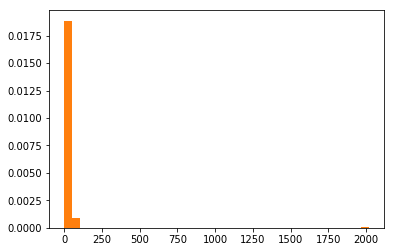

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

users = pd.read_csv('../../2_data/explored/customer.csv')

age = users[ users['AGE']>0 ]['AGE']
plt.hist(age, normed=True, bins=40)
plt.show()

จะเห็นว่ามีคนอายุ 2000 แต่คนอายุมากสุดในโลกอายุแค่ 122 ปี ดังนั้นลองเลือกช่วงเป็น 0 - 122 จะได้

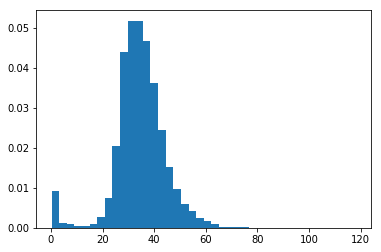

In [66]:
age = users[ (users['AGE'] > 0) & (users['AGE'] < 122) ]['AGE']
plt.hist(age, normed=True, bins=40)
plt.show()

ลักษณะเป็น normal distribution